In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# importing data
df = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\df_small_updated.pkl")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9050078 entries, 0 to 32404846
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fre

## Dependant Group Analysis

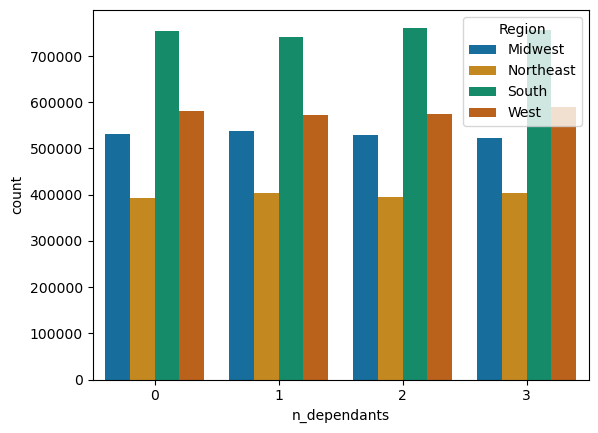

In [29]:
fig_9 =sns.countplot(x='n_dependants', data=df, palette ='colorblind', hue ='Region')

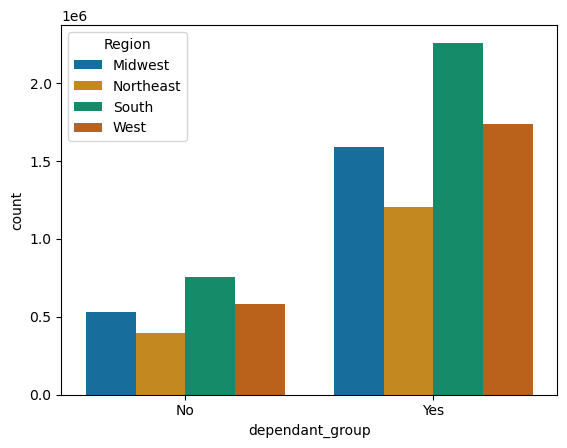

In [31]:
 fig_10 =sns.countplot(x='dependant_group', data=df, palette ='colorblind', hue ='Region')

In [8]:
path =r"C:\Users\Windows\Instacart Basket Analysis"

In [34]:
fig_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig9_dependant_region.png'))

In [35]:
fig_10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig10_dependant_group_region.png'))

In [36]:
df.groupby('n_dependants')['prices'].agg(['max', 'min', 'mean'])

,max,min,mean
n_dependants,,,
0,99999.0,1.0,11.757289
1,99999.0,1.0,11.780748
2,99999.0,1.0,12.274266
3,99999.0,1.0,11.564055


In [37]:
df.groupby('dependant_group')['prices'].agg(['max', 'min', 'mean'])

,max,min,mean
dependant_group,,,
No,99999.0,1.0,11.757289
Yes,99999.0,1.0,11.872597


In [38]:
df.groupby('n_dependants')['days_since_prior_order'].agg(['max', 'min', 'mean'])

,max,min,mean
n_dependants,,,
0,30.0,0.0,10.430836
1,30.0,0.0,10.443722
2,30.0,0.0,10.465777
3,30.0,0.0,10.457515


In [39]:
df.groupby('dependant_group')['days_since_prior_order'].agg(['max', 'min', 'mean'])

,max,min,mean
dependant_group,,,
No,30.0,0.0,10.430836
Yes,30.0,0.0,10.455685


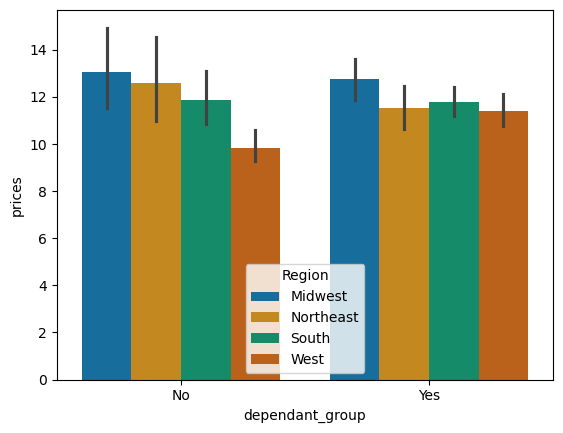

In [40]:
fig_11 = sns.barplot(data = df, x='dependant_group', y='prices', hue='Region', palette='colorblind', errorbar = 'ci')

In [41]:
fig_11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig11_dependant_group_price_region.png'))

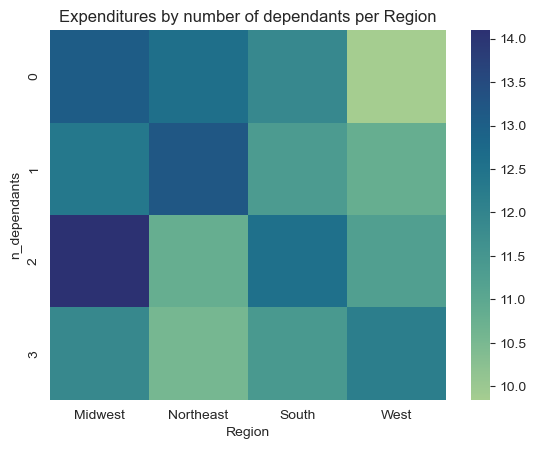

In [61]:
# data visualization of the average prices as a function of the number of dependants
ct_1 = pd.crosstab(df['n_dependants'],df['Region'], values =df['prices'], aggfunc ='mean')
heatmap_1 = sns.heatmap(ct_1, cmap='crest')
plt.title('Expenditures by number of dependants per Region')
heatmap_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_1_number_of_dependants_price_region.png'))

C:\Users\Windows\AppData\Local\Temp\ipykernel_10884\1323944912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_14 = sns.barplot(x='dependant_group', y='prices', data = df, palette = 'Paired', errorbar=('ci', 95))


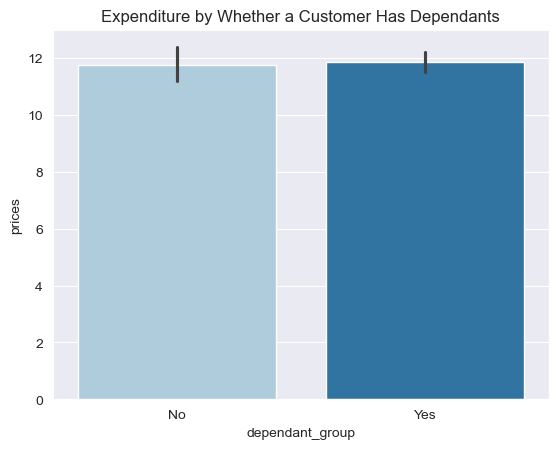

In [63]:
# data visualization of spending by dependant group
fig_14 = sns.barplot(x='dependant_group', y='prices', data = df, palette = 'Paired', errorbar=('ci', 95))
plt.title('Expenditure by Whether a Customer Has Dependants')
fig_14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig14_dependant_group_prices.png'))

## Family Status

In [18]:
# Group by family status and calculate the max, min, mean of the prices by family status
df.groupby('fam_status')['prices'].agg(['max', 'min', 'mean'])

,max,min,mean
fam_status,,,
divorced/widowed,99999.0,1.0,11.829780
living with parents and siblings,99999.0,1.0,10.200988
married,99999.0,1.0,11.986725
single,99999.0,1.0,11.719590


In [24]:
# data visualization of the average prices across different groups. 

ct = pd.crosstab(df['fam_status'],df['Region'], values =df['prices'], aggfunc ='mean')

Text(0.5, 1.0, 'Expenditures by Family Status per Region')

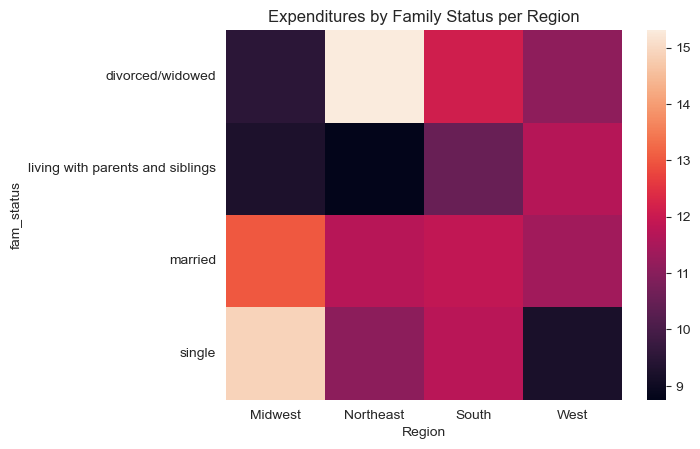

In [57]:
heatmap_2 = sns.heatmap(ct, cmap='rocket')
plt.title('Expenditures by Family Status per Region')

In [58]:
heatmap_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_2_fam_status_price_region.png'))

In [28]:
# Group by family status and calculate days_since_prior_order 
df.groupby('fam_status')['days_since_prior_order'].agg(['max', 'min', 'mean'])

,max,min,mean
fam_status,,,
divorced/widowed,30.0,0.0,10.395083
living with parents and siblings,30.0,0.0,10.417612
married,30.0,0.0,10.458284
single,30.0,0.0,10.449430


Text(0.5, 1.0, 'Distrubtion of customers by family status and frequency type')

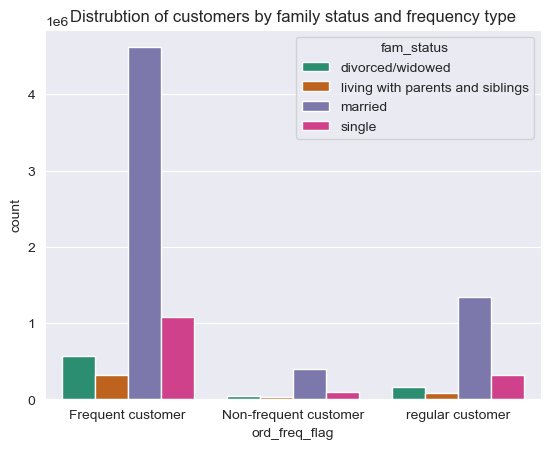

In [59]:
# Distrubtion of customers by family status and frequency type
sns.set_style('darkgrid')
fig_13 = sns.countplot (data=df, x='ord_freq_flag', hue ='fam_status', palette='Dark2')
plt.title ('Distrubtion of customers by family status and frequency type')

In [60]:
fig_13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig13_fam_status_frequency_type.png'))